# **Which job titles are the most prevalent?**

Data Science represents a multidisciplinary approach that integrates data analysis, algorithmic innovation, and technological advancement to address sophisticated analytical problems. At its core lies data — extensive volumes of unprocessed information that are systematically stored within databases. This project, conducted as part of the Udacity Data Scientist Nanodegree Program, is dedicated to examining and applying these fundamental principles.

## Project Objective:
The goal of this project is to identify the most in-demand fields and job titles in the labor market. This helps technologists and job seekers identify the most relevant programming skills and languages for each field.

The project answers several important questions, including:

What are the most common job titles among StackOverflow users?
What are the most common programming languages among developers?
Is there a relationship between job titles and the programming languages used?

## 1: Business Understanding

In this phase, we define the project's goal. The main goal was summarized in three questions:

What are the most common job titles among StackOverflow users?
What are the most common programming languages used by developers?
Is there a relationship between job titles and the programming languages used?
Data Understanding

Data was collected from the official StackOverflow Developer Survey. Key columns for analysis were identified:

Job Titles (DevType)
Programming Languages (LanguageHaveWorkedWith)
Other relevant classifications
Some missing values and irrelevant entries (such as students who are not actively in the workforce) were discovered during this stage.

## 2: Data Preparation

Data cleaning was performed to handle missing values and exclude students to focus on the relevant job data

## 3: Data Modeling:
Various techniques were used to analyze the data, such as:

Correlation Analysis between job titles and programming languages to identify patterns and relationships.
Frequency Analysis was applied to determine the most common programming languages and job titles.

## 4:  Evaluation:
The results were evaluated using:

Statistical Analysis Tools and appropriate data tests to ensure the validity of the findings.
The results were presented in the form of tables and heatmaps to clarify the relationships between different variables.

## 5: Deployment:
The results of the project were published on:

GitHub and Medium, where this phase was included to document how the results are displayed and made accessible to the public

Conclusion
This analysis gives a data-driven overview of today's tech job market, especially for developers. Understanding which skills align with which roles can help you plan your learning journey or job search more effectively.

## first step: Data Understanding

In [1]:
#import important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

In [2]:
#load dataIn May 2024 over 65,000 developers responded to our annual survey about coding,
#working, AI and how they feel about all of those topics and more. 
df = pd.read_csv("survey_results_public.csv")
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [3]:
list(df.columns)

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [4]:
# Show basic statistics for the DataFrame
print(df.describe)


<bound method NDFrame.describe of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employ

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


In [6]:
#show first 5 rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Step(2):Clean data

In [16]:
def clean_dataframe(df):
    """
    Clean the dataframe by selecting relevant columns, removing students,
    and dropping missing values.
    
    Parameters:
        df (pd.DataFrame): Raw input dataframe.

    Returns:
        pd.DataFrame: Cleaned dataframe.
    """
    df = df[['MainBranch', 'Employment', 'Country', 'EdLevel','YearsCode', 'DevType', 'LanguageHaveWorkedWith']]
    df = df[~df['DevType'].str.contains('Student', na=False)]
    df = df.dropna()
    return df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52079 entries, 1 to 65435
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MainBranch              52079 non-null  object
 1   Employment              52079 non-null  object
 2   Country                 52079 non-null  object
 3   EdLevel                 52079 non-null  object
 4   YearsCode               52079 non-null  object
 5   DevType                 52079 non-null  object
 6   LanguageHaveWorkedWith  52079 non-null  object
dtypes: object(7)
memory usage: 3.2+ MB


# STEP(3): Analyze data

In [20]:
def get_top_counts(series, top_n=10, separator=';'):
    """
    Count the most common items in a column where each row has items separated by a character.
    
    Parameters:
        series (pd.Series): A pandas series with delimited string entries.
        top_n (int): Number of top items to return.
        separator (str): Delimiter used to split entries.
    
    Returns:
        list of tuples: Top N most common items and their counts.
    """
    items = series.dropna().str.split(separator).sum()
    counter = Counter(items)
    return counter.most_common(top_n)

In [22]:
def plot_horizontal_bar(data, title, xlabel, ylabel):
    """
    Plot a horizontal bar chart for given data.
    
    Parameters:
        data (list of tuples): Each tuple contains (label, count).
        title (str): Chart title.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    labels, counts = zip(*data)
    plt.figure(figsize=(10,6))
    plt.barh(labels, counts, color=plt.cm.viridis(range(len(labels))))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().invert_yaxis()
    plt.show()

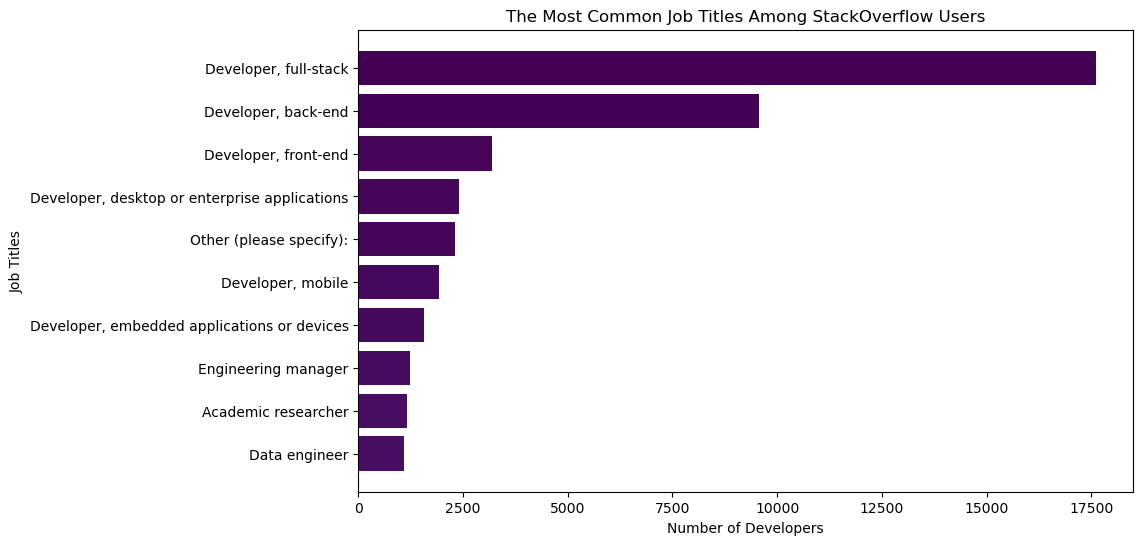

In [24]:
# Most popular jobs
top_10_jobs = get_top_counts(df['DevType'])
plot_horizontal_bar(
    top_10_jobs,
    "The Most Common Job Titles Among StackOverflow Users",
    "Number of Developers",
    "Job Titles"
)

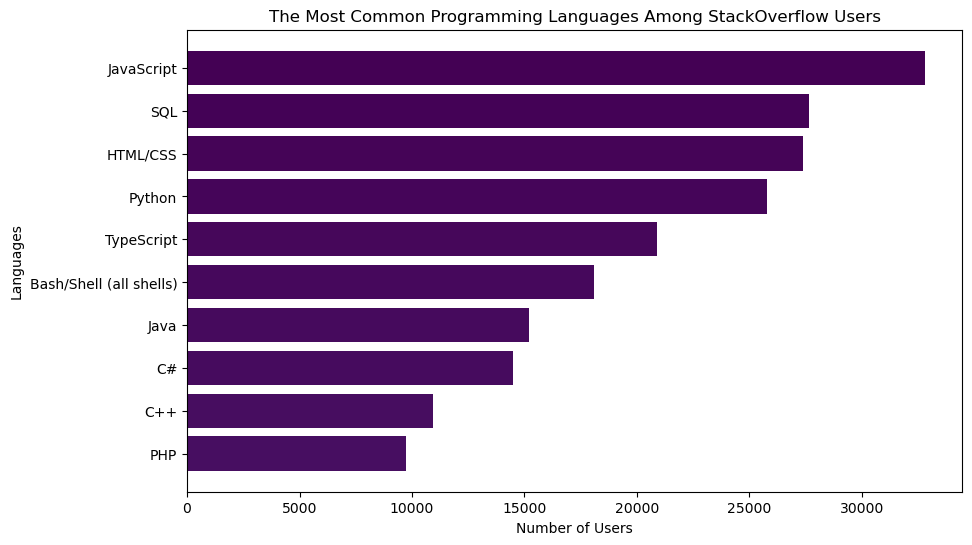

In [26]:
top_10_languages = get_top_counts(df['LanguageHaveWorkedWith'])
plot_horizontal_bar(
    top_10_languages,
    "The Most Common Programming Languages Among StackOverflow Users",
    "Number of Users",
    "Languages"
)

In [82]:


def plot_heatmap_top_jobs_languages(df, top_jobs_n=10, top_langs_n=10):
    """
    Generates a heatmap between top job titles and top programming languages.

    Parameters:
    df (pd.DataFrame): Cleaned DataFrame with 'DevType' and 'LanguageHaveWorkedWith'.
    top_jobs_n (int): Number of top job titles to include.
    top_langs_n (int): Number of top languages to include.
    """

    # Split multiple values into separate rows
    df = df.dropna(subset=['DevType', 'LanguageHaveWorkedWith'])
    df = df.copy()
    df['DevType'] = df['DevType'].str.split(';')
    df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')

    df = df.explode('DevType')
    df = df.explode('LanguageHaveWorkedWith')

    # Count combinations
    crosstab = pd.crosstab(df['DevType'].str.strip(), df['LanguageHaveWorkedWith'].str.strip())

    # Filter top N jobs and top N languages
    top_jobs = df['DevType'].value_counts().nlargest(top_jobs_n).index
    top_langs = df['LanguageHaveWorkedWith'].value_counts().nlargest(top_langs_n).index

    filtered = crosstab.loc[top_jobs, top_langs]

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(filtered, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Top Programming Languages by Job Titles')
    plt.xlabel('Programming Languages')
    plt.ylabel('Job Titles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


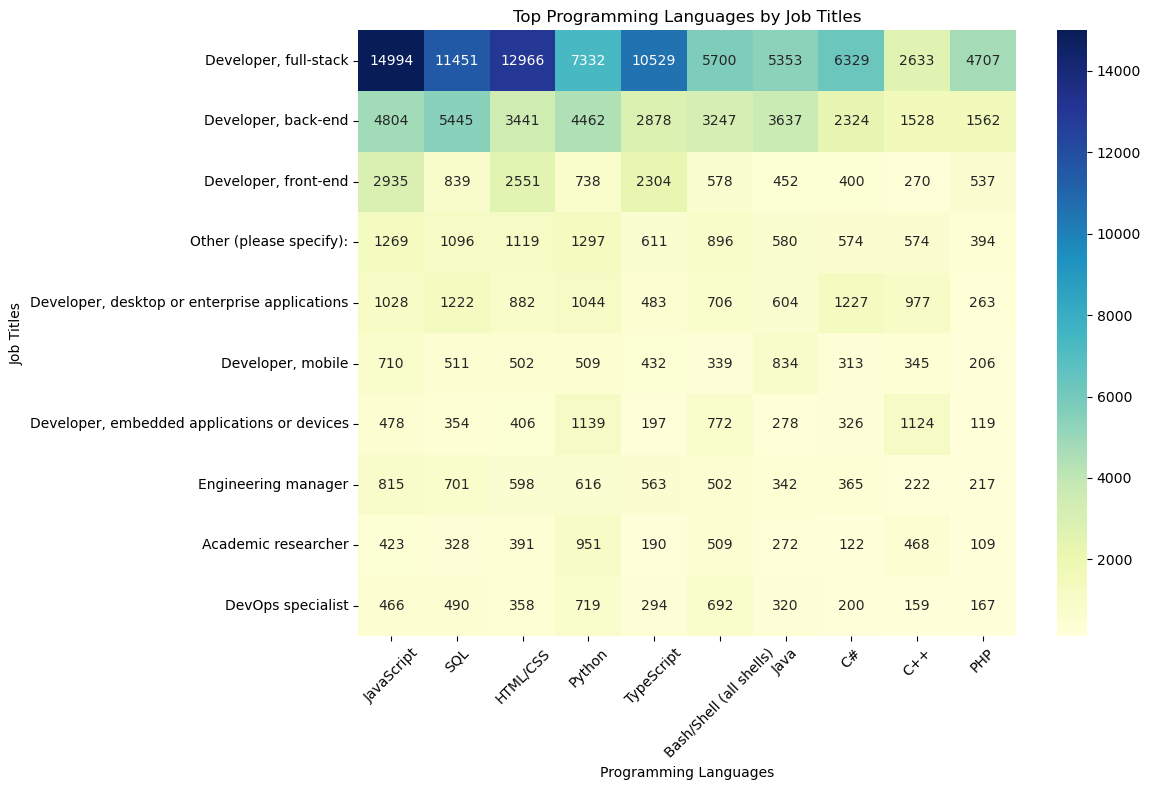

In [84]:
plot_heatmap_top_jobs_languages(df)

In [144]:
from sklearn.metrics import accuracy_score, classification_report

def convert_years_code(years_code):
    if isinstance(years_code, str): 
        if 'more than' in years_code.lower():
            return 51  # Convert "More than 50 years" to 51
        elif years_code == 'Less than 1 year':
            return 0  # Convert "Less than 1 year" to 0
    return float(years_code)  # Convert other values to numbers

# Apply the conversion to the 'YearsCode' column
df['YearsCode'] = df['YearsCode'].apply(convert_years_code)

# Handle missing values
df['YearsCode'] = df['YearsCode'].fillna(df['YearsCode'].median())  # Replace missing values with the median

# Convert categorical columns to numeric values using LabelEncoder
df['EdLevel'] = LabelEncoder().fit_transform(df['EdLevel'].astype(str))
df['Employment'] = LabelEncoder().fit_transform(df['Employment'].astype(str))

# Define features (X) and target variable (y)
X = df[['YearsCode', 'EdLevel', 'Employment']]
y = df['DevType']

# Convert the target variable (y) to numeric values
y_encoded = LabelEncoder().fit_transform(y)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Calculate and print the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf * 100:.2f}%")


Accuracy (Random Forest): 32.15%
